# 2-Layer Gradient Descent 

This note is mostly taken from Trask's Grokking DL chapter 4. I gave it the name of two layer as it dealt with (1) one input and one output, (2) multiple input and one output, and (3) multiple inputs and multiple outputs. A 2-layer network is the basis for all of them.

It first described the simplest learning method, "hot and cold learning". It works by for each weight update: it looks at two directions, up and down by a fixed amount. It then calculate the error (MSE) and see which direction give a better result (smaller error), then it adjusted weight according to it, and move to next iteration until it converages.


The Gradient Descent was discussed in this context as a better way to do this kind of "look to the left, , look to the right, and then take steps", as seen in the following code snippet, `direction_and_amount`.



In [2]:
weight = 0.5
goal_pred = 0.8
input = 0.5
for i in range(20):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    direction_and_amount = (pred - goal_pred) * input # GD
    weight = weight - direction_and_amount

    print(f"Error: {error}, prediction: {pred}")

Error: 0.30250000000000005, prediction: 0.25
Error: 0.17015625000000004, prediction: 0.3875
Error: 0.095712890625, prediction: 0.49062500000000003
Error: 0.05383850097656251, prediction: 0.56796875
Error: 0.03028415679931642, prediction: 0.6259765625
Error: 0.0170348381996155, prediction: 0.669482421875
Error: 0.00958209648728372, prediction: 0.70211181640625
Error: 0.005389929274097089, prediction: 0.7265838623046875
Error: 0.0030318352166796153, prediction: 0.7449378967285156
Error: 0.0017054073093822882, prediction: 0.7587034225463867
Error: 0.0009592916115275371, prediction: 0.76902756690979
Error: 0.0005396015314842384, prediction: 0.7767706751823426
Error: 0.000303525861459885, prediction: 0.7825780063867569
Error: 0.00017073329707118678, prediction: 0.7869335047900676
Error: 9.603747960254256e-05, prediction: 0.7902001285925507
Error: 5.402108227642978e-05, prediction: 0.7926500964444131
Error: 3.038685878049206e-05, prediction: 0.7944875723333098
Error: 1.7092608064027242e-05, 

The book discussed three **effect** of multipling input to pure error as `(pred-goal_pred)`.
* stopping: you don't learn or change weight when input is 0, there is nothing to learn
* negative reversal: this is to make weight move in the right direction EVEN if input is negative. The Grokking book didn't explain this well, IMO.
* scaling: when input is big, you want the weight update to be big ...





In [3]:
weight, goal_pred, input = (0.0, 0.8, 1.1)
for i in range(4):
    print(f"======\nweight: {weight:.4f}")
    pred = input * weight
    error = (pred-goal_pred) ** 2
    delta = pred - goal_pred 
    weight_delta = delta * input # same gradient descent
    weight = weight - weight_delta 
    print(f"Error: {error:.4f}, prediction: {pred:.4f}")
    print(f"Delta: {delta:.4f}, weight_delta:{weight_delta:.4f}")


weight: 0.0000
Error: 0.6400, prediction: 0.0000
Delta: -0.8000, weight_delta:-0.8800
weight: 0.8800
Error: 0.0282, prediction: 0.9680
Delta: 0.1680, weight_delta:0.1848
weight: 0.6952
Error: 0.0012, prediction: 0.7647
Delta: -0.0353, weight_delta:-0.0388
weight: 0.7340
Error: 0.0001, prediction: 0.8074
Delta: 0.0074, weight_delta:0.0081


## Error is a function of weight

`error = ((input * weight) - goal_pred) ** 2`, is the same as `error = ((0.5 * weight) - 0.8) ** 2` if we fix input and goal_pred. 

Mathematically, this is the same as:

$ y(x) = ((0.5 * x) - 0.8) ** 2$

$y$ is error, and $x$ is weight.


Let is graph this quadratic function




[Text(0, 0.5, 'error'), Text(0.5, 0, 'weight')]

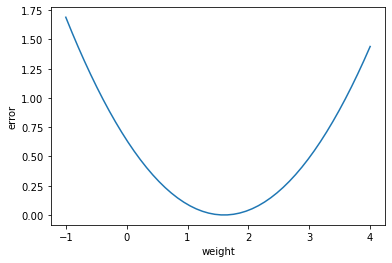

In [11]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
x = np.linspace(-1, 4, 50)
y = ((0.5*x) - 0.8)**2
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(xlabel='weight', ylabel='error')

What it tells me is, since $y$ is error, there is a smallest error, where $x$ is the optimal weight we need to learn.



At this point - the book should have just used calculus concept to spell it out, instead, it settles on:

> Given a function, the derivitive represents **the direction** and **the amount** that one variable changes if you change the other variable.

> The derivitive is the slope on the curve: it tells how much error change when you change weight. In the previous code, derivitive is `weight_delta`.

> This method for learning is called "gradient descent": move weight value toward the opposite the the gradient value. In other words, increase weight value when gradient is negative; decrease value when gradient is positive.

That is why we have `weight = weight - weight_delta`.





# Diverge and Alpha Value

if you put in a large input value in above code:



In [1]:
weight, goal_pred, input = (0.0, 0.8, 2)
for i in range(4):
    print(f"======\nweight: {weight:.4f}")
    pred = input * weight
    error = (pred-goal_pred) ** 2
    delta = pred - goal_pred 
    weight_delta = delta * input # same gradient descent
    weight = weight - weight_delta 
    print(f"Error: {error:.4f}, prediction: {pred:.4f}")
    print(f"Delta: {delta:.4f}, weight_delta:{weight_delta:.4f}")

weight: 0.0000
Error: 0.6400, prediction: 0.0000
Delta: -0.8000, weight_delta:-1.6000
weight: 1.6000
Error: 5.7600, prediction: 3.2000
Delta: 2.4000, weight_delta:4.8000
weight: -3.2000
Error: 51.8400, prediction: -6.4000
Delta: -7.2000, weight_delta:-14.4000
weight: 11.2000
Error: 466.5600, prediction: 22.4000
Delta: 21.6000, weight_delta:43.2000


Now the prediction starts to "diverge".

The fix, try a alpha value doing learning:

```
weight = weight - 0.1 * weight_delta
```

